In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk
import pandas as pd
import urllib.request
from urllib import request
import PyPDF2
import seaborn as sns

from nltk.tokenize import RegexpTokenizer,word_tokenize,sent_tokenize
from textblob import TextBlob
from collections import OrderedDict
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# nltk.download('vader_lexicon')

sns.set_style('whitegrid')

In [2]:
plt.rcParams['figure.figsize'] = [16, 9]  # changing parameters for presented plots
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

In [3]:
import urllib.request
pdf_path = ""
def download_file(download_url, filename):
    response = urllib.request.urlopen(download_url)    
    file = open(filename + ".pdf", 'wb')
    file.write(response.read().decode('utf-8'))
    file.close()


In [4]:
url = "https://blogs.ubc.ca/edcp508/files/2016/02/TheLittlePrince.pdf"
def download_file(download_url, filename):
    response = urllib.request.urlopen(download_url)    
    file = open(filename + ".pdf", 'wb')
    file.write(response.read())
    file.close()
 


In [5]:
download_file(url, "little_prince")
file = open("little_prince.pdf", 'rb')
pdfReader = PyPDF2.PdfFileReader(file)

In [6]:
numPages = pdfReader.numPages
book = []
for numPage in range(3, 63):
    book.append(pdfReader.getPage(numPage).extractText())

In [7]:
tempBook = {}
for num, Page in enumerate(book):
    tempBook[num+1] = Page

In [8]:
activeChapter = None
chapters = {}
i = 4
for page in book:
    pageText = page[:5]
    text = pageText.replace(str(i), '')
    chapter = re.findall(r'^\d+', text)
    if chapter:
        chapter = chapter[0]
        activeChapter = int(chapter)
    if not activeChapter in chapters.keys():
        chapters[activeChapter] = page.replace(pageText, text)
    else:
        chapters[activeChapter] = chapters[activeChapter] + ' ' + page.replace(pageText, text)
    i+=1
    

# Deleting stop words. There is need to clean all pages. 

In [9]:
Tokenizer = RegexpTokenizer(r"\w+[A-Za-z0-9-]+")

In [10]:
# aby usunąć numer strony potrzebne będą regexy
newBook = []
for page in book:
    newPage = Tokenizer.tokenize(page)
    newBook.append(newPage)

In [11]:
from nltk.corpus import stopwords
eng_stopwords = stopwords.words("english")

In [12]:
cleanBook = []
for separatedPage in newBook:
    separated_text_cleaned = [word for word in separatedPage if word.lower() not in eng_stopwords]
    cleanBook.append(separated_text_cleaned)

# Sentiment analysis

In [13]:
plainPages = []
for page in newBook:
    plainPages.append(" ".join(page))

In [14]:
cleanPages = []
for page in cleanBook:
    cleanPages.append(" ".join(page))

In [15]:
polarityWithStopWords = {}
subjectivityWithStopWords = {}
for page, text in enumerate(plainPages):
    textBlob = TextBlob(text)
    sentiment = textBlob.sentiment
    polarityWithStopWords[page+1] = sentiment[0]
    subjectivityWithStopWords[page+1] = sentiment[1]
    
polarityWithoutStopWords = {}
subjectivityWithoutStopWords = {}
for page, text in enumerate(cleanPages):
    textBlob = TextBlob(text)
    sentiment = textBlob.sentiment
    polarityWithoutStopWords[page+1] = sentiment[0]
    subjectivityWithoutStopWords[page+1] = sentiment[1]

In [16]:
pages = list(subjectivityWithStopWords.keys())

polarityWSW = list(polarityWithStopWords.values())
polarityWOSW = list(polarityWithoutStopWords.values())

subjectivityWSW = list(subjectivityWithStopWords.values())
subjectivityWOSW = list(subjectivityWithoutStopWords.values())

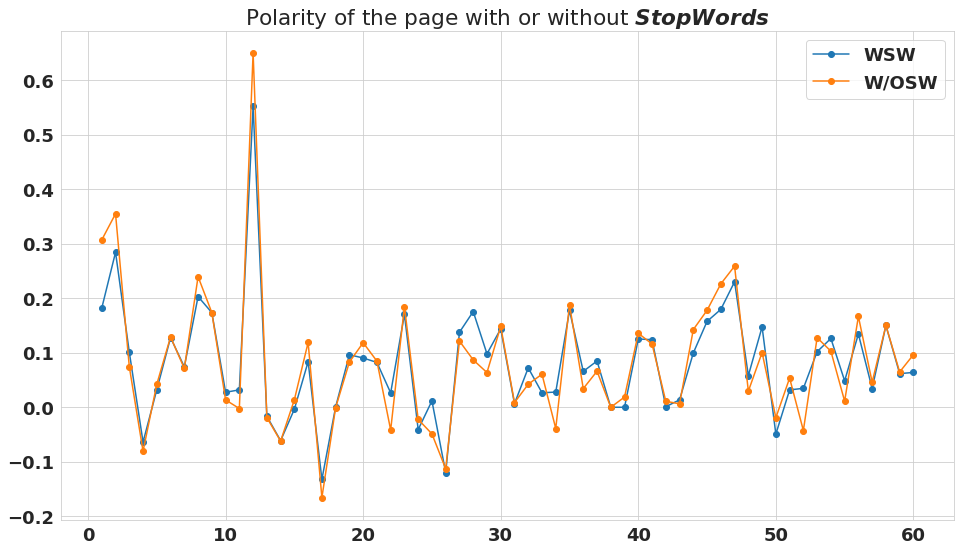

In [17]:
plt.figure(figsize=(16, 9))

plt.title("Polarity of the page with or without $Stop Words$")
plt.plot(pages, polarityWSW, 'o-', label='WSW')
plt.plot(pages, polarityWOSW, 'o-', label='W/OSW')
plt.legend(loc=0)

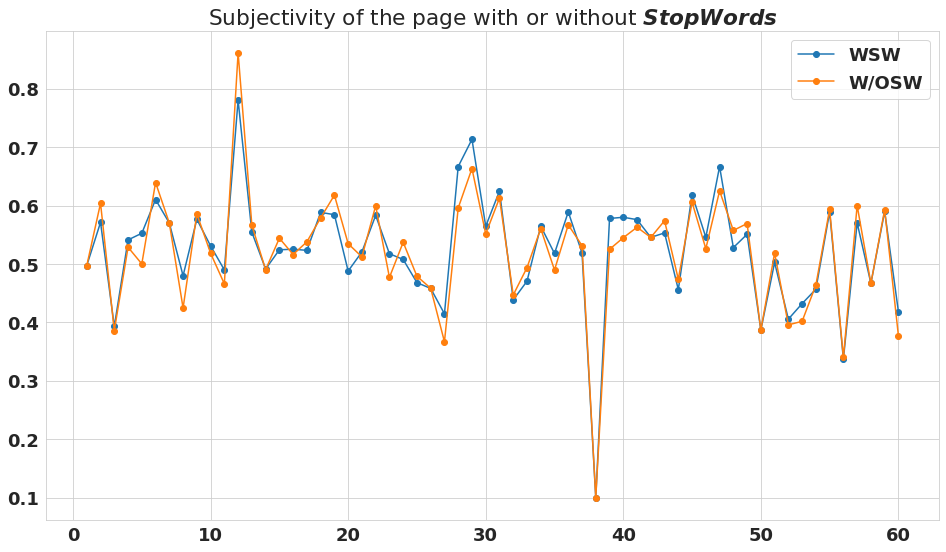

In [18]:
plt.figure(figsize=(16, 9))

plt.title("Subjectivity of the page with or without $Stop Words$")
plt.plot(pages, subjectivityWSW, 'o-', label='WSW')
plt.plot(pages, subjectivityWOSW, 'o-', label='W/OSW')
plt.legend(loc=0)

In [19]:
sent_per_chapter = {'polarity':{}, 'subjectivity':{}}
for chapt in chapters.keys():
    text = chapters[chapt][1:]
    textBlob = TextBlob(text)
    ith_results = textBlob.sentiment 
    sent_per_chapter['polarity'][chapt] = ith_results[0]
    sent_per_chapter['subjectivity'][chapt] = ith_results[1]

In [20]:
chaptNumbers = list(chapters.keys())
polarity = list(sent_per_chapter['polarity'].values())
subjectivity = list(sent_per_chapter['subjectivity'].values())

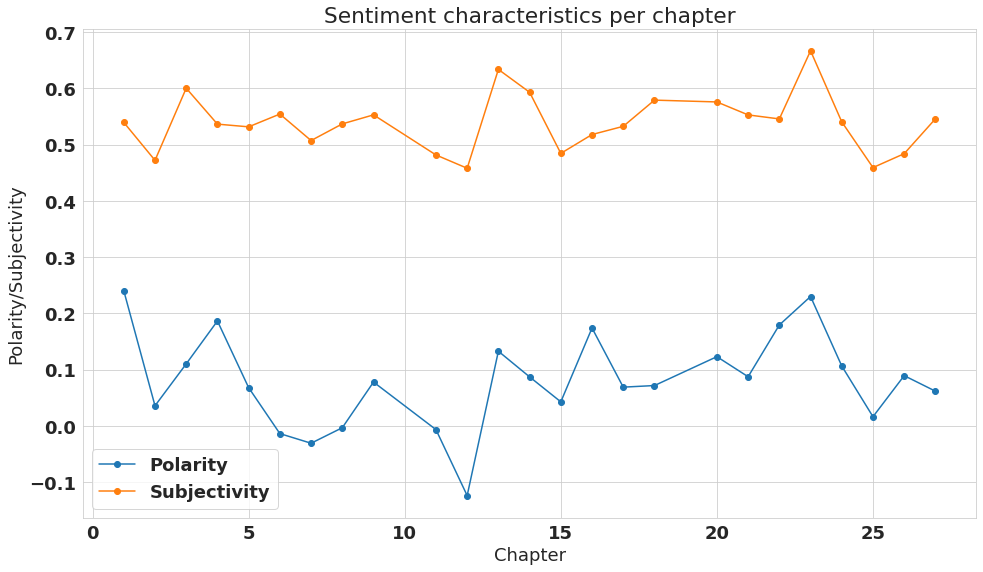

In [21]:
plt.title("Sentiment characteristics per chapter")
plt.plot(chaptNumbers, polarity,'o-', label='Polarity')
plt.plot(chaptNumbers, subjectivity, 'o-', label='Subjectivity')
plt.xlabel("Chapter")
plt.ylabel("Polarity/Subjectivity")
plt.legend(loc=0)

In [22]:
sent_per_chapter_WOSW = {'polarity':{}, 'subjectivity':{}}
for chapt in chapters.keys():
    temp_text = chapters[chapt][1:]
    text = Tokenizer.tokenize(temp_text)
    text_cleaned = [word for word in text if word.lower() not in eng_stopwords]
    clean = " ".join(text_cleaned)
    textBlob = TextBlob(clean)
    ith_results = textBlob.sentiment 
    sent_per_chapter_WOSW['polarity'][chapt] = ith_results[0]
    sent_per_chapter_WOSW['subjectivity'][chapt] = ith_results[1]

In [23]:
chaptNumbers = list(chapters.keys())
polarity_WOSW = list(sent_per_chapter_WOSW['polarity'].values())
subjectivity_WOSW = list(sent_per_chapter_WOSW['subjectivity'].values())

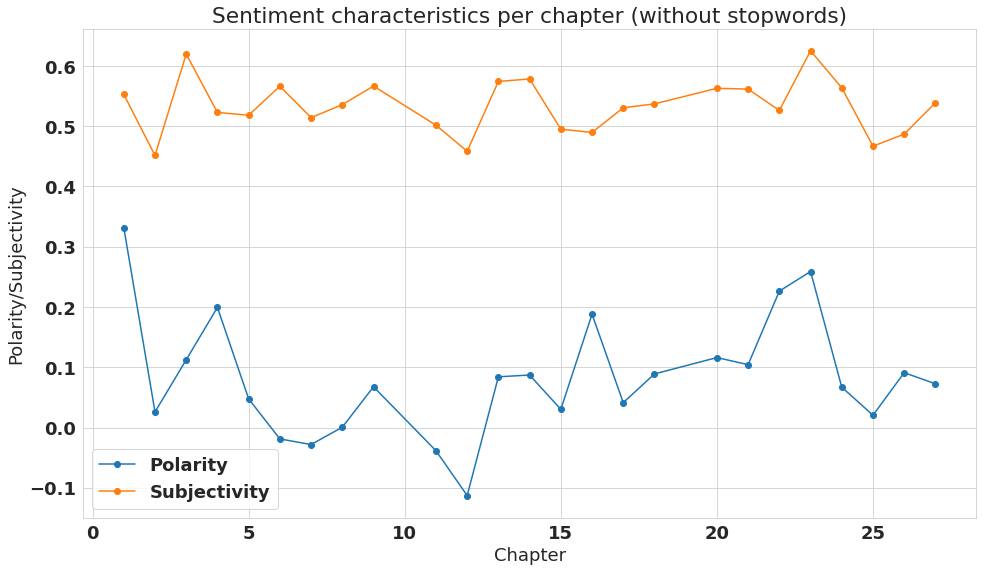

In [24]:
plt.title("Sentiment characteristics per chapter (without stopwords)")
plt.plot(chaptNumbers, polarity_WOSW,'o-', label='Polarity')
plt.plot(chaptNumbers, subjectivity_WOSW, 'o-', label='Subjectivity')
plt.xlabel("Chapter")
plt.ylabel("Polarity/Subjectivity")
plt.legend(loc=0)

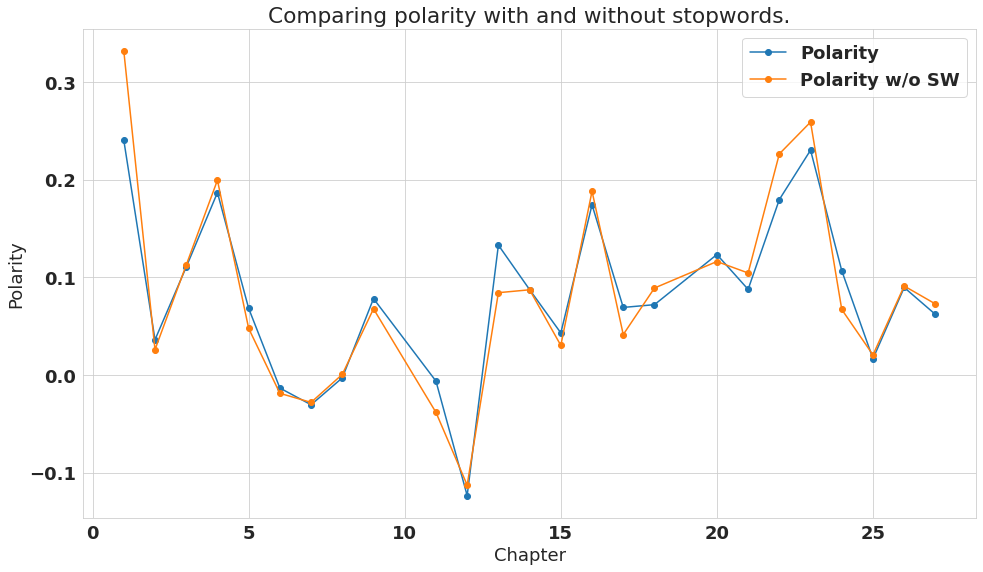

In [25]:
plt.title("Comparing polarity with and without stopwords.")
plt.plot(chaptNumbers, polarity,'o-', label='Polarity')
plt.plot(chaptNumbers, polarity_WOSW, 'o-', label='Polarity w/o SW')
plt.xlabel("Chapter")
plt.ylabel("Polarity")
plt.legend(loc=0)

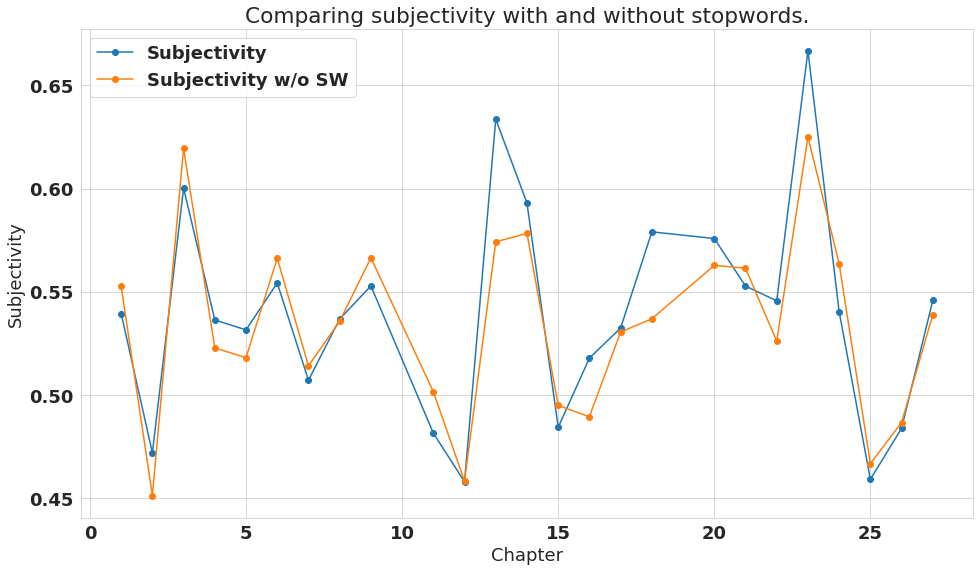

In [26]:
plt.title("Comparing subjectivity with and without stopwords.")
plt.plot(chaptNumbers, subjectivity,'o-', label='Subjectivity')
plt.plot(chaptNumbers, subjectivity_WOSW, 'o-', label='Subjectivity w/o SW')
plt.xlabel("Chapter")
plt.ylabel("Subjectivity")
plt.legend(loc=0)

## Character occurance per page

In [27]:
dictionary = {} # klucze - litery; wartości - ile razy wystapiło na stronie też słownik
for num, Page in enumerate(newBook):
    charactersSequence = "".join(Page).lower()
    characters = {}
    for character in charactersSequence:
        if character not in characters.keys():
            characters[character] = 1
        else:
            characters[character] += 1
    for char in list(characters.keys()):
        if char not in list(dictionary.keys()):
            dictionary[char]={}
            dictionary[char][num+1] = characters[char]
        else:
            dictionary[char][num+1] = characters[char]
temp_dictionary = OrderedDict(sorted(dictionary.items()))

In [28]:
temp = {k:sum(v) for k, v in temp_dictionary.items()}
sortedCharOccur = {k: v for k, v in sorted(temp.items(), key=lambda item: item[1], reverse=True)}
sortedCharOccur_DF = pd.DataFrame(data={'character':list(sortedCharOccur.keys()), 'occurance':list(sortedCharOccur.values())})

<AxesSubplot:xlabel='character'>

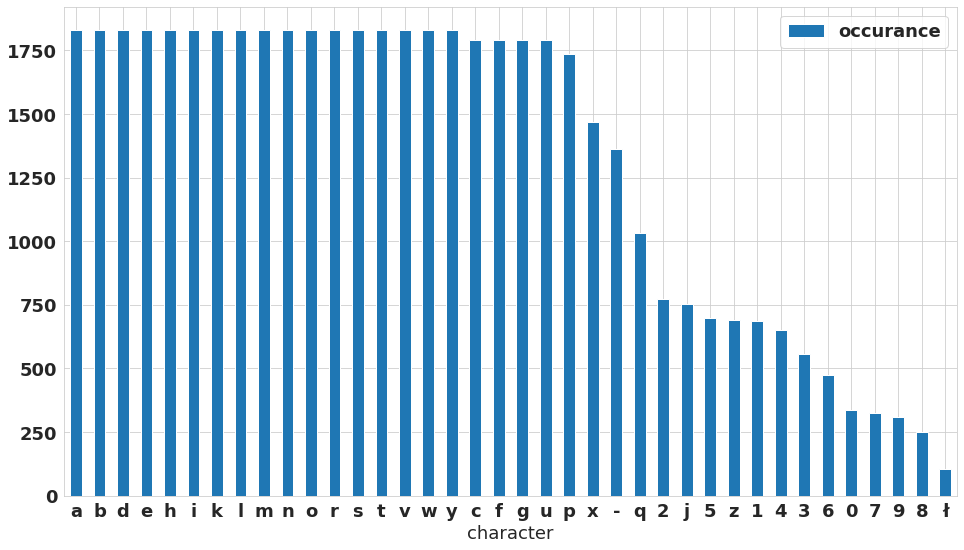

In [29]:
sortedCharOccur_DF.plot.bar(x='character', y='occurance', rot=0)

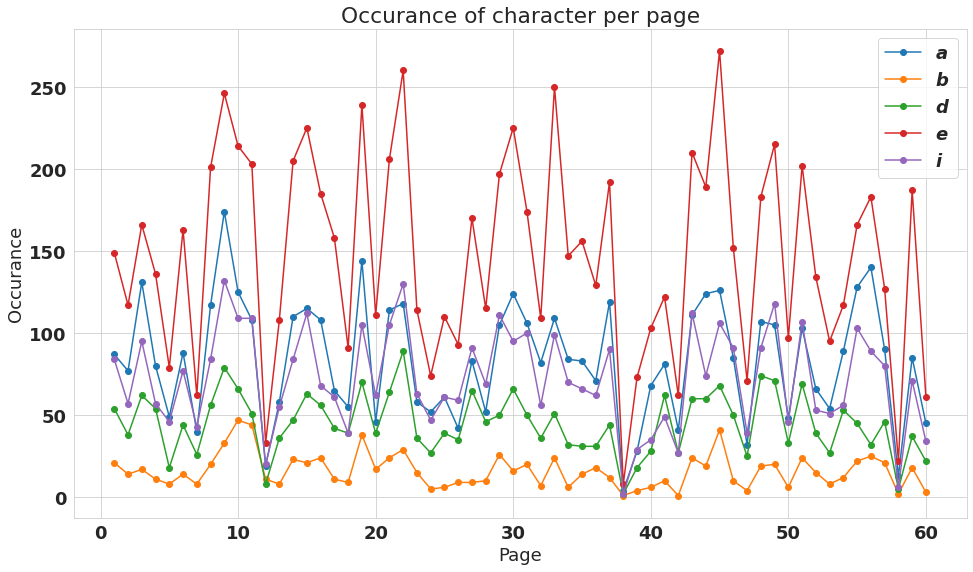

In [30]:
num_pages = list(temp_dictionary['a'].keys())
char_occur_a = list(temp_dictionary['a'].values())
char_occur_b = list(temp_dictionary['b'].values())
char_occur_d = list(temp_dictionary['d'].values())
char_occur_e = list(temp_dictionary['e'].values())
char_occur_i = list(temp_dictionary['i'].values())

# plt.figure(figsize=(16,9))
plt.plot(num_pages, char_occur_a, 'o-', label='$a$')
plt.plot(num_pages, char_occur_b, 'o-', label='$b$')
plt.plot(num_pages, char_occur_d, 'o-', label='$d$')
plt.plot(num_pages, char_occur_e, 'o-', label='$e$')
plt.plot(num_pages, char_occur_i, 'o-', label='$i$')
plt.xlabel("Page")
plt.ylabel("Occurance")
plt.title("Occurance of character per page")
plt.legend()

In [31]:
# newBook[1] # 2 strona
entireBook = []
for Page in newBook:
    entireBook += Page

In [32]:
words_occur = {}
for word in entireBook:
    temp = word.lower()
    if temp in words_occur.keys():
        words_occur[temp] += 1
    else:
        words_occur[temp] = 1

In [33]:
sortedWordsOccur = {k: v for k, v in sorted(words_occur.items(), key=lambda item: item[1], reverse=True)}

In [34]:
list(sortedWordsOccur.items())[:20] # first 20 the most popular words (including stopwords)

[('the', 971),
 ('to', 465),
 ('and', 344),
 ('of', 334),
 ('that', 317),
 ('is', 301),
 ('he', 296),
 ('you', 296),
 ('it', 263),
 ('little', 258),
 ('said', 195),
 ('was', 193),
 ('prince', 184),
 ('in', 175),
 ('my', 162),
 ('not', 159),
 ('me', 152),
 ('but', 146),
 ('have', 141),
 ('are', 136)]

In [35]:
cleanSortWordsOccur = {}
for key in sortedWordsOccur.keys():
    if key not in eng_stopwords:
        cleanSortWordsOccur[key] = sortedWordsOccur[key]

In [36]:
list(cleanSortWordsOccur.items())[:20] # first 20 the most popular words (excluding stopwords)

[('little', 258),
 ('said', 195),
 ('prince', 184),
 ('one', 130),
 ('planet', 69),
 ('would', 62),
 ('like', 57),
 ('flower', 53),
 ('good', 46),
 ('time', 45),
 ('never', 41),
 ('stars', 41),
 ('sheep', 39),
 ('made', 37),
 ('come', 37),
 ('shall', 35),
 ('much', 33),
 ('man', 33),
 ('king', 33),
 ('fox', 33)]